<a href="https://colab.research.google.com/github/cboyda/LighthouseLabs/blob/main/Project_Stats_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import plotly.express as px

In [85]:
# how to mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
df_foursquare = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Project-Statistics_city_bikes_FourSquare.csv')
df_yelp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Project-Statistics_city_bikes_yelp.csv')
merged_df = df_foursquare.merge(df_yelp, on=['city', 'station_name','latitude', 'longitude','empty_slots','slots','free_bikes','ebikes'])
df = merged_df.copy()

In [87]:
#df.to_csv('/content/drive/MyDrive/Colab Notebooks/datasets/merged_citybikes_final.csv', index=False)

In [88]:
df.shape

(242, 12)

In [89]:
# sunburst requires non-zero values
df[df['ebikes'] == 0]

,city,station_name,empty_slots,slots,free_bikes,ebikes,latitude,longitude,station_location,location_count,yelp_location_count,yelp_review_count
1,Vancouver,Yaletown-Roundhouse Station,6,16,10,0,49.274566,-123.121817,"49.274566,-123.121817",0,14,94
4,Vancouver,8th & Ash,15,16,1,0,49.264215,-123.117772,"49.264215,-123.117772",0,9,69
5,Vancouver,Spyglass & Seawall,2,14,12,0,49.270877,-123.115103,"49.270877,-123.115103",3,11,73
7,Vancouver,Ontario & Seawall,0,20,20,0,49.271721,-123.104207,"49.271721,-123.104207",1,7,34
11,Vancouver,Marinaside & Davie,12,22,10,0,49.273471,-123.118016,"49.273471,-123.118016",2,13,86
...,...,...,...,...,...,...,...,...,...,...,...,...
222,Vancouver,29th & Cambie,15,20,5,0,49.245135,-123.116098,"49.245135,-123.116098",0,7,178
229,Vancouver,Lakewood & Triumph,14,16,2,0,49.283968,-123.061615,"49.283968,-123.061615",1,3,4
230,Vancouver,Wall & Eton,4,18,14,0,49.287464,-123.060771,"49.287464,-123.060771",2,3,4
231,Vancouver,Lakewood & Oxford,14,18,4,0,49.285575,-123.061575,"49.285575,-123.061575",1,3,4


In [90]:
# for this visualization drop zero ebikes rows (97)
df = df[df['ebikes'] != 0]

In [91]:
df.shape

(145, 12)

In [92]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
import geopandas as gpd

# Specify the path to the shapefile without the extension
shapefile_path = '/content/drive/MyDrive/Colab Notebooks/datasets/vancouver_neighbourhoods'

# Load the shapefile
neighborhoods = gpd.read_file(shapefile_path)

# Specify the CRS of the neighborhood boundaries
neighborhoods_crs = neighborhoods.crs
"""
This crs solves error:
The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

<ipython-input-34-d654c02b8256>:11: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.
"""

# Print the DataFrame to verify the loaded data
print(neighborhoods.head())


  mapid               name                                           geometry
0    DS  Dunbar-Southlands  POLYGON ((-123.17017 49.24789, -123.17025 49.2...
1  KERR         Kerrisdale  POLYGON ((-123.17908 49.21556, -123.17870 49.2...
2   KIL          Killarney  POLYGON ((-123.02356 49.20015, -123.03998 49.2...
3  KITS          Kitsilano  POLYGON ((-123.13768 49.27532, -123.14375 49.2...
4    SC       South Cambie  POLYGON ((-123.11599 49.23794, -123.11617 49.2...


In [94]:
# can we divide the stations into regions?
# Assuming you have a DataFrame named df with columns: station_name, latitude, longitude

# Create a GeoDataFrame from the stations DataFrame
stations_gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude)
)

# Set the CRS of the stations GeoDataFrame to match the CRS of the neighborhoods
stations_gdf = stations_gdf.set_crs(neighborhoods_crs)

# Perform spatial join
stations_with_regions = gpd.sjoin(stations_gdf, neighborhoods, how="left", predicate="within")

# Check the resulting DataFrame
stations_with_regions.head()


,city,station_name,empty_slots,slots,free_bikes,ebikes,latitude,longitude,station_location,location_count,yelp_location_count,yelp_review_count,geometry,index_right,mapid,name
0,Vancouver,10th & Cambie,22,35,13,4,49.262487,-123.114397,"49.262487,-123.114397",0,8,42,POINT (-123.11440 49.26249),17.0,MP,Mount Pleasant
2,Vancouver,Dunsmuir & Beatty,23,26,3,1,49.279764,-123.110154,"49.279764,-123.110154",0,10,61,POINT (-123.11015 49.27976),7.0,CBD,Downtown
3,Vancouver,12th & Yukon (City Hall),14,16,2,2,49.260599,-123.113504,"49.260599,-123.113504",0,10,49,POINT (-123.11350 49.26060),17.0,MP,Mount Pleasant
6,Vancouver,Stamps Landing,7,14,7,1,49.268930,-123.118130,"49.26893,-123.11813",4,10,76,POINT (-123.11813 49.26893),8.0,FAIR,Fairview
8,Vancouver,Canada Place,13,26,13,2,49.287214,-123.112870,"49.287214,-123.11287",0,6,56,POINT (-123.11287 49.28721),7.0,CBD,Downtown


In [95]:
# Assuming `stations_with_regions` contains the result of the spatial join
# and `df` is your original DataFrame

# Extract the relevant columns from `stations_with_regions`
neighborhood_names = stations_with_regions[['station_name', 'name']]

# Merge the neighborhood names with the original DataFrame based on the station name
df = df.merge(neighborhood_names, on='station_name', how='left')

# Rename the column to 'neighbourhood'
df = df.rename(columns={'name': 'neighbourhood'})


# Check the updated DataFrame
df.head()


,city,station_name,empty_slots,slots,free_bikes,ebikes,latitude,longitude,station_location,location_count,yelp_location_count,yelp_review_count,neighbourhood
0,Vancouver,10th & Cambie,22,35,13,4,49.262487,-123.114397,"49.262487,-123.114397",0,8,42,Mount Pleasant
1,Vancouver,Dunsmuir & Beatty,23,26,3,1,49.279764,-123.110154,"49.279764,-123.110154",0,10,61,Downtown
2,Vancouver,12th & Yukon (City Hall),14,16,2,2,49.260599,-123.113504,"49.260599,-123.113504",0,10,49,Mount Pleasant
3,Vancouver,Stamps Landing,7,14,7,1,49.268930,-123.118130,"49.26893,-123.11813",4,10,76,Fairview
4,Vancouver,Canada Place,13,26,13,2,49.287214,-123.112870,"49.287214,-123.11287",0,6,56,Downtown


In [96]:
# find any null neighbourhoods
df[df['neighbourhood'].isnull()]

,city,station_name,empty_slots,slots,free_bikes,ebikes,latitude,longitude,station_location,location_count,yelp_location_count,yelp_review_count,neighbourhood
28,Vancouver,Stanley Park - Vancouver Aquarium,6,16,10,1,49.299292,-123.130281,"49.299292,-123.130281",0,8,1228,NaN
86,Vancouver,Stanley Park - Third Beach Parking Lot,32,38,6,1,49.302577,-123.155616,"49.302577,-123.155616",1,1,2,NaN


In [97]:
# Replace missing values in 'neighbourhood' column with a placeholder
df['neighbourhood'] = df['neighbourhood'].fillna('Unknown')


In [98]:
#df = px.data.gapminder()
fig = px.sunburst(df,
                  path=['city','neighbourhood','station_name'],
                  color='free_bikes',
                  values='ebikes') # size of slice
fig.show()

This is too busy, too many stations, consider grouping.

In [99]:
# Group stations by neighborhood and calculate the sum of ebikes and free_bikes
#grouped_df = df.groupby('neighbourhood').agg({'ebikes': 'sum', 'free_bikes': 'sum'}).reset_index()
grouped_df = df.groupby(['city', 'neighbourhood']).agg({'ebikes': 'sum', 'free_bikes': 'sum'}).reset_index()
grouped_df

,city,neighbourhood,ebikes,free_bikes
0,Vancouver,Arbutus-Ridge,5,6
1,Vancouver,Downtown,51,269
2,Vancouver,Fairview,28,76
3,Vancouver,Grandview-Woodland,25,98
4,Vancouver,Kensington-Cedar Cottage,8,25
5,Vancouver,Kitsilano,42,191
6,Vancouver,Mount Pleasant,66,222
7,Vancouver,Riley Park,23,35
8,Vancouver,Shaughnessy,5,17
9,Vancouver,South Cambie,8,20


In [100]:
fig = px.sunburst(grouped_df,
                  path=['city','neighbourhood'],
                  color='free_bikes',
                  values='ebikes', # size of slice
                  color_continuous_scale='Viridis')
fig.show()

In [101]:
import plotly.offline as pyo
# Save the chart as an HTML file
pyo.plot(fig, filename='/content/drive/MyDrive/Colab Notebooks/datasets/sunburst_chart.html')

'/content/drive/MyDrive/Colab Notebooks/datasets/sunburst_chart.html'

# Create Heat Map Visualization

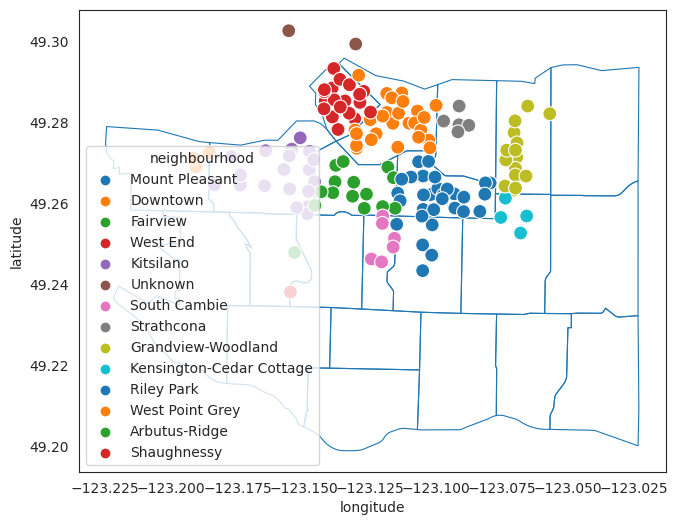

In [103]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the shapefile using GeoPandas
shapefile_path = "/content/drive/MyDrive/Colab Notebooks/datasets/vancouver_neighbourhoods/local-area-boundary.shp"  
gdf = gpd.read_file(shapefile_path)

# Assuming you have a DataFrame named 'df' with latitude, longitude, and neighbourhood columns
plt.figure(figsize=(10, 6))
sns.set_style('white')
sns.scatterplot(
    palette='tab10',
    x=df.longitude,
    y=df.latitude,
    hue=df.neighbourhood,
    zorder=5,
    s=100
)

# Plot the shapefile boundaries
gdf.boundary.plot(ax=plt.gca(), linewidth=0.8)

plt.show()


<ipython-input-104-4b3a4dd4a8c9>:21: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



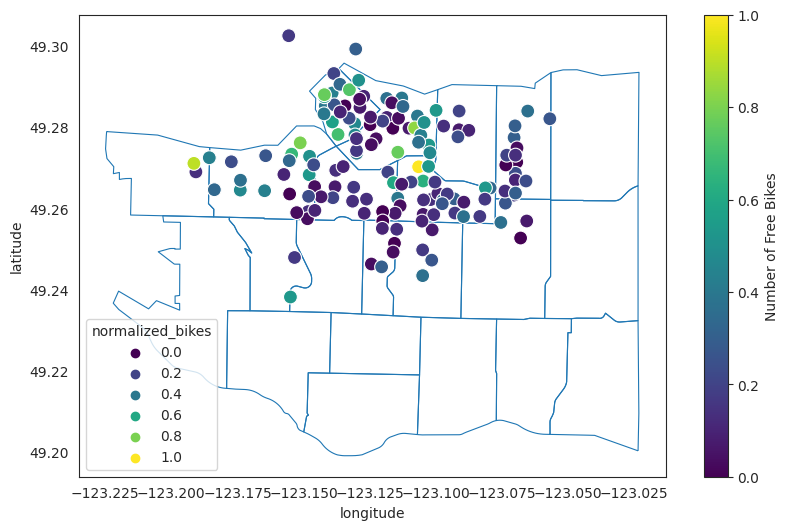

In [104]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Read the shapefile using GeoPandas
shapefile_path = "/content/drive/MyDrive/Colab Notebooks/datasets/vancouver_neighbourhoods/local-area-boundary.shp"
gdf = gpd.read_file(shapefile_path)

# Assuming you have a DataFrame named 'df' with latitude, longitude, and number of free bikes columns
plt.figure(figsize=(10, 6))
sns.set_style('white')

# Define the range of the number of free bikes
min_bikes = df['free_bikes'].min()
max_bikes = df['free_bikes'].max()

# Map the range of free bikes to a colormap
cmap = cm.get_cmap('viridis')

# Normalize the number of free bikes to the range [0, 1]
df['normalized_bikes'] = (df['free_bikes'] - min_bikes) / (max_bikes - min_bikes)

# Plot the scatterplot with colored dots based on the number of free bikes
scatter = sns.scatterplot(
    x=df.longitude,
    y=df.latitude,
    hue=df.normalized_bikes,
    palette=cmap,
    zorder=5,
    s=100
)

# Plot the shapefile boundaries
gdf.boundary.plot(ax=scatter.axes, linewidth=0.8)  # Specify the axes to plot the shapefile boundaries

# Add a colorbar to show the range of the number of free bikes
norm = Normalize(vmin=df.normalized_bikes.min(), vmax=df.normalized_bikes.max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=scatter.axes)  # Specify the axes for the colorbar
cbar.set_label('Number of Free Bikes')

plt.show()


<ipython-input-105-9f0aaac939d0>:27: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

<ipython-input-105-9f0aaac939d0>:42: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



<Figure size 1000x600 with 0 Axes>

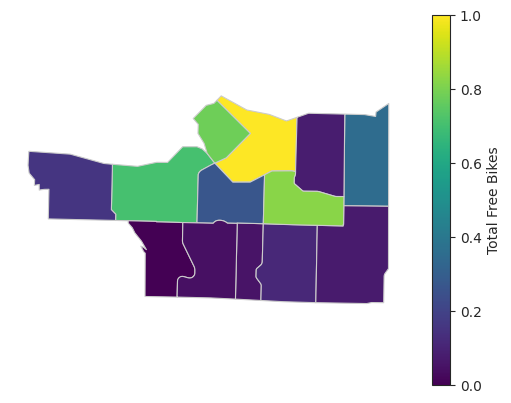

In [105]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize

# Read the shapefile using GeoPandas
shapefile_path = "/content/drive/MyDrive/Colab Notebooks/datasets/vancouver_neighbourhoods/local-area-boundary.shp"
gdf = gpd.read_file(shapefile_path)

# Assuming you have a DataFrame named 'df' with latitude, longitude, and number of free bikes columns
plt.figure(figsize=(10, 6))
sns.set_style('white')

# Aggregate the number of free bikes by neighborhood
neighborhood_data = df.groupby('neighbourhood')['free_bikes'].sum().reset_index()

# Merge the neighborhood data with the shapefile data
merged_data = gdf.merge(neighborhood_data, left_on='name', right_on='neighbourhood')

# Define the range of the aggregated number of free bikes
min_bikes = merged_data['free_bikes'].min()
max_bikes = merged_data['free_bikes'].max()

# Map the range of free bikes to a colormap
cmap = get_cmap('viridis')

# Normalize the aggregated number of free bikes to the range [0, 1]
merged_data['normalized_bikes'] = (merged_data['free_bikes'] - min_bikes) / (max_bikes - min_bikes)

# Plot the choropleth map of the neighborhoods with color-coded polygons
ax = merged_data.plot(column='normalized_bikes', cmap=cmap, linewidth=0.8, edgecolor='0.8', legend=False)

# Remove the x and y scales
ax.set_axis_off()

# Add a colorbar to show the range of the aggregated number of free bikes
norm = Normalize(vmin=merged_data['normalized_bikes'].min(), vmax=merged_data['normalized_bikes'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Total Free Bikes')

plt.show()


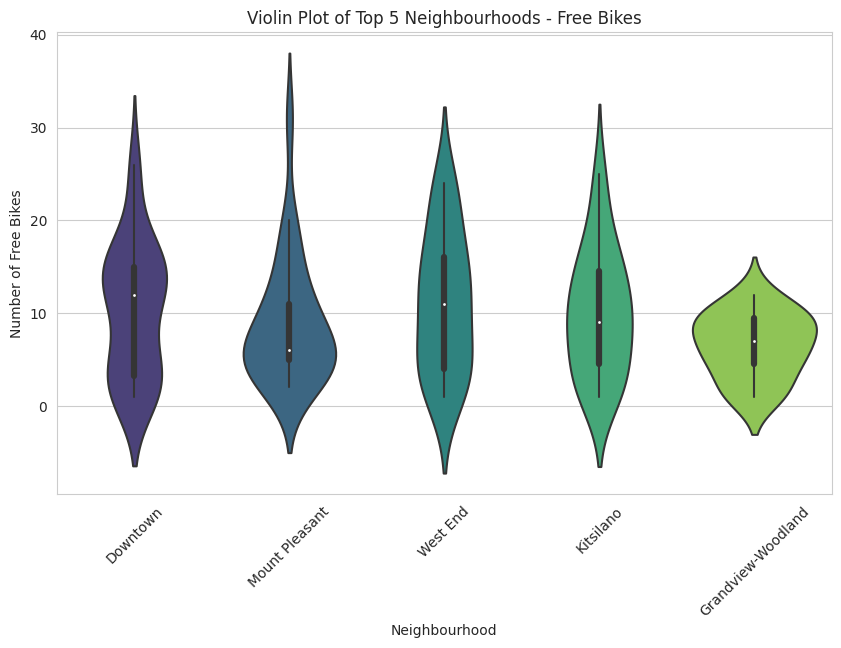

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' with 'neighbourhood' and 'free_bikes' columns
top_neighbourhoods = df.groupby('neighbourhood')['free_bikes'].sum().nlargest(5).index.tolist()
df_top = df[df['neighbourhood'].isin(top_neighbourhoods)]

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

# Set the color palette
colors = sns.color_palette('viridis', len(top_neighbourhoods))

# Create the violin plot
sns.violinplot(data=df_top, x='neighbourhood', y='free_bikes', order=top_neighbourhoods, palette=colors)

# Set the title and axis labels
plt.title('Violin Plot of Top 5 Neighbourhoods - Free Bikes')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Free Bikes')

plt.xticks(rotation=45)

plt.show()
